# Proyecto Venta de Casas en King County, USA

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of 
construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Los datos están disponibles [aquí](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

## Preguntas del CEO
A partir de estos datos, hay que contestar las siguientes preguntas. 

1. ¿Cuántas casas hay disponibles para comprar?
2. ¿Cuántos atributos tienen las casas?
3. ¿Cuáles son los atributos de las casas?
4. ¿Cuál es la casa más cara (casa con mayor valor de venta)?
5. ¿Qué casa tiene más cuartos?
6. ¿Cuál es la suma total de trimestres en el conjunto de datos?
7. ¿Cuántas casas tienen 2 baños?
8. ¿Cuál es el precio promedio de todas las casas en el conjunto de datos?
9. ¿Cuál es el precio medio de las viviendas de 2 baños?
10. ¿Cuál es el precio mínimo para viviendas de 3 dormitorios?
11. ¿Cuántas casas tienen más de 300 metros cuadrados en la sala?
12. ¿Cuántas casas tienen más de 2 plantas?
13. ¿Cuántas casas tienen vista al mar?
14. De las casas con vistas al mar, ¿cuántas tienen 3 habitaciones?
15. De las casas con más de 300 metros cuadrados de salón, ¿cuántas tienen más de 2 baños?

## Respondiendo las preguntas del CEO 

In [4]:
import pandas as pd
import seaborn as sns
from plotly import express as px
from matplotlib import pyplot as plt
from matplotlib import gridspec 

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
listas = ['a','b','c']
tuplas = ('a','b','c')
diccionarios = {'Var1':1, 'Var':2}

In [6]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

In [7]:
pd.DataFrame.from_dict(data)

col_1 col_2
0      3     a
1      2     b
2      1     c
3      0     d

In [8]:
data = pd.read_csv('../data/kc_house_data.csv')

In [9]:
data.tail(10)

id             date      price  bedrooms  bathrooms  \
21603  7852140040  20140825T000000  507250.00         3       2.50   
21604  9834201367  20150126T000000  429000.00         3       2.00   
21605  3448900210  20141014T000000  610685.00         4       2.50   
21606  7936000429  20150326T000000 1007500.00         4       3.50   
21607  2997800021  20150219T000000  475000.00         3       2.50   
21608   263000018  20140521T000000  360000.00         3       2.50   
21609  6600060120  20150223T000000  400000.00         4       2.50   
21610  1523300141  20140623T000000  402101.00         2       0.75   
21611   291310100  20150116T000000  400000.00         3       2.50   
21612  1523300157  20141015T000000  325000.00         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21603         2270      5536    2.00           0     0  ...      8   
21604         1490      1126    3.00           0     0  ...      8   
21605         2520      6023    2.00           0     0  ...      9   
21606         3510      7200    2.00           0     0  ...      9   
21607         1310      1294    2.00           0     0  ...      8   
21608         1530      1131    3.00           0     0  ...      8   
21609         2310      5813    2.00           0     0  ...      8   
21610         1020      1350    2.00           0     0  ...      7   
21611         1600      2388    2.00           0     0  ...      8   
21612         1020      1076    2.00           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat  \
21603        2270              0      2003             0    98065 47.54   
21604        1490              0      2014             0    98144 47.57   
21605        2520              0      2014             0    98056 47.51   
21606        2600            910      2009             0    98136 47.55   
21607        1180            130      2008             0    98116 47.58   
21608        1530              0      2009             0    98103 47.70   
21609        2310              0      2014             0    98146 47.51   
21610        1020              0      2009             0    98144 47.59   
21611        1600              0      2004             0    98027 47.53   
21612        1020              0      2008             0    98144 47.59   

         long  sqft_living15  sqft_lot15  
21603 -121.88           2270        5731  
21604 -122.29           1400        1230  
21605 -122.17           2520        6023  
21606 -122.40           2050        6200  
21607 -122.41           1330        1265  
21608 -122.35           1530        1509  
21609 -122.36           1830        7200  
21610 -122.30           1020        2007  
21611 -122.07           1410        1287  
21612 -122.30           1020        1357  

[10 rows x 21 columns]

In [10]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
data.shape

(21613, 21)

In [12]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
data[['sqft_basement','zipcode']]

sqft_basement  zipcode
0                  0    98178
1                400    98125
2                  0    98028
3                910    98136
4                  0    98074
...              ...      ...
21608              0    98103
21609              0    98146
21610              0    98144
21611              0    98027
21612              0    98144

[21613 rows x 2 columns]

# 1. ¿Cuántas casas hay disponibles para comprar?


In [14]:
print('Están disponibles {} casas'.format(data['id'].nunique()))

Están disponibles 21436 casas


# 2. ¿Cuántos atributos tienen las casas?


In [15]:
print('Los inmuebles tienen {} atributos'.format(len(data.columns)-2))

Los inmuebles tienen 19 atributos


# 3. ¿Cuáles son los atributos de las casas?


In [16]:
aux = data.columns.tolist()
aux.remove('id')
aux.remove('date')
print('Los atributos de las casas son: {}'.format(aux))

Los atributos de las casas son: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


# 4. ¿Cuál es la casa más cara (casa con mayor valor de venta)?


In [17]:
data[data['price']==data['price'].max()].T

7252
id                  6762700020
date           20141013T000000
price               7700000.00
bedrooms                     6
bathrooms                 8.00
sqft_living              12050
sqft_lot                 27600
floors                    2.50
waterfront                   0
view                         3
condition                    4
grade                       13
sqft_above                8570
sqft_basement             3480
yr_built                  1910
yr_renovated              1987
zipcode                  98102
lat                      47.63
long                   -122.32
sqft_living15             3940
sqft_lot15                8800

# 5. ¿Qué casa tiene más cuartos?


In [18]:
data[data['bedrooms'] == data['bedrooms'].max()].T

15870
id                  2402100895
date           20140625T000000
price                640000.00
bedrooms                    33
bathrooms                 1.75
sqft_living               1620
sqft_lot                  6000
floors                    1.00
waterfront                   0
view                         0
condition                    5
grade                        7
sqft_above                1040
sqft_basement              580
yr_built                  1947
yr_renovated                 0
zipcode                  98103
lat                      47.69
long                   -122.33
sqft_living15             1330
sqft_lot15                4700

# 6. ¿Cuál es la suma total de habitaciones en el conjunto de datos?


In [19]:
print('En total, hay {} habitaciones a la venta'.format(data['bedrooms'].sum()))

En total, hay 72854 habitaciones a la venta


# 7. ¿Cuántas casas tienen 2 baños?


In [20]:
print('Hay {} con únicamente dos baños'.format(data[data['bathrooms'] == 2].shape[0]))

Hay 1930 con únicamente dos baños


# 8. ¿Cuál es el precio promedio de todas las casas en el conjunto de datos?


In [21]:
print('El precio promedio de todas las casas del conjunto de datos es de {}'.format(data['price'].mean()))

El precio promedio de todas las casas del conjunto de datos es de 540088.1417665294


In [22]:
print('En total, se movieron {} dólares en el mercado inmobiliario de King Count entre 2014 y 2015'.format(data['price'].sum()))

En total, se movieron 11672925008.0 dólares en el mercado inmobiliario de King Count entre 2014 y 2015


# 9. ¿Cuál es el precio medio de las viviendas de 2 baños?


In [23]:
data[data['bathrooms'] ==2]['price'].mean()

457889.7186528497

In [24]:
print('El precio medio de las viviendas de dos baños es de {}'.format(round(data.loc[data['bathrooms'] ==2,'price'].mean(),2)))

El precio medio de las viviendas de dos baños es de 457889.72


# 10. ¿Cuál es el precio mínimo para viviendas de 3 dormitorios?


In [25]:
print('{} es el precio mínimo de una vivienda con tres habitaciones'.format(round(data.loc[data['bedrooms']==3, 'price'].min(),2)))

82000.0 es el precio mínimo de una vivienda con tres habitaciones


# 11. ¿Cuántas casas tienen más de 300 metros cuadrados en la sala?


In [26]:
print('Hay {} casa con más de 300 metros cuadrados en la sala'.format(data[data['sqft_living']>300].shape[0]))

Hay 21612 casa con más de 300 metros cuadrados en la sala


# 12. ¿Cuántas casas tienen más de 2 plantas?


In [27]:
resultado = data[data['floors']>2].shape[0]
print('Hay {} casas con más de dos pisos'.format(resultado))

Hay 782 casas con más de dos pisos


# 13. ¿Cuántas casas tienen vista al mar?


In [28]:
resultado = data[data['waterfront']== 1].shape[0]
print('Hay {} casas con vista al agua'.format(resultado))

Hay 163 casas con vista al agua


In [29]:
data['waterfront'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: waterfront, Length: 21613, dtype: bool

# 14. De las casas con vistas al mar, ¿cuántas tienen 3 habitaciones?


In [30]:
T = True
F = False
# original
print('El valor de la sentencia es: {}'.format(F))
#  negación 
res1 = not F
print('El valor de la sentencia es: {}'.format(res1))
# conjuncion (y)
res2 = T & T 
print('El valor de la sentencia es: {}'.format(res2))
# disyunción (o)
res3 = F | F
print('El valor de la sentencia es: {}'.format(res3))

El valor de la sentencia es: False
El valor de la sentencia es: True
El valor de la sentencia es: True
El valor de la sentencia es: False


In [31]:
p = [True, True, False, False]
q = [True, False, True, False]

#create new df 
df = pd.DataFrame({'p':p,'q':q})
df

# # Crear columna de la negación de p
df['~p'] = ~ df['p']
df['~q'] = ~ df['q']
df['p y q'] = df['p'] & df['q']
df['p o q'] = df['p'] | df['q']
df['p -> q'] = df['~p'] | df['q']

df

p      q     ~p     ~q  p y q  p o q  p -> q
0   True   True  False  False   True   True    True
1   True  False  False   True  False   True   False
2  False   True   True  False  False   True    True
3  False  False   True   True  False  False    True

In [32]:
resultado = data[(data['waterfront'] ==1) & (data['bedrooms'] ==3 )].shape[0]
print('Hay {} casas con vista a la mar y con tres habitaciones'.format(resultado))

Hay 64 casas con vista a la mar y con tres habitaciones


# 15. De las casas con más de 300 pies cuadrados de sala, ¿cuántas tienen más de 2 baños?

In [33]:
resultado = data[(data['sqft_living']>300) & (data['bathrooms']>2)].shape[0]
print('Hay {} casas con salas de más de 300 pies cuadradaos y más de dos baños'.format(resultado))

Hay 11242 casas con salas de más de 300 pies cuadradaos y más de dos baños


# Cuántas casas frente al agua con tres habitaciones y más de dos baños

In [34]:
restultado = data[(data['waterfront'] == 1)&(data['bedrooms'] ==3)&(data['bathrooms']>2)].shape[0]
print('Hay {} casa frente al agua con tres habitaciones y más de dos baños'.format(resultado))

Hay 11242 casa frente al agua con tres habitaciones y más de dos baños


# Nuevas preguntas del CEO 

1. Cree una nueva columna llamada: "house_age"
    - Si el valor de la columna "fecha" es mayor que 2015-01-01 => 'new_house'
    - Si el valor de la columna "fecha" es menor que 2015-01-01 => 'old_house'
   '
2. Cree una nueva columna llamada: "dormitory_type"
    - Si el valor de la columna “dormitorios” es igual a 1 => ‘estudio’
    - Si el valor de la columna “dormitorios” es igual a 2 => 'apartamento'
    - Si el valor de la columna “dormitorios” es mayor a 2 => 'casa'
3. Cree una nueva columna llamada: "condition_type"
    - Si el valor de la columna "condición" es menor o igual a 2 => 'malo'
    - Si el valor de la columna "condición" es igual a 3 o 4 => 'regular'
    - Si el valor de la columna "condición" es igual a 5 => 'bueno'
4. Cambie el TIPO en la columna "condición" a CADENA
5. Elimine las columnas: "sqft_living15" y "sqft_lot15"
6. Cambie el TIPO en la columna "yr_build" a FECHA
7. Cambie el TIPO en la columna "yr_renovated" a FECHA
8. ¿Cuál es la fecha más temprana de construcción de una propiedad?
9. ¿Cuál es la fecha de renovación más temprana para una propiedad?
10. ¿Cuántas propiedades tienen 2 pisos?
11. ¿Cuántas propiedades se encuentran en condición igual a “regular”?
12. ¿Cuántas propiedades están en una condición igual a “mala” y tienen “vistas al agua”?
13. ¿Cuántas propiedades tienen una condición igual a “buena” y son “nueva_casa”?
14. ¿Cuál es el valor de la propiedad de “estudio” más cara?
15. ¿Cuántas propiedades de “apartamentos” se renovaron en 2015?
16. ¿Cuál es la mayor cantidad de cuartos que tiene una propiedad tipo “casa”?
17. ¿Cuántas propiedades de “casa_nueva” se renovaron en 2014?
18. Seleccione las columnas: “id”, “fecha”, “precio”, “pisos”, “código postal” por método:
    - Directo por nombre de columna.
    - Por los Índices.
    - Por los índices de las filas y el nombre de las columnas
    - Índices booleanos 
19. Guarde un archivo .csv con solo las columnas del elemento 10 al 17.

# 1. Cree una nueva columna llamada: "house_age"
    - Si el valor de la columna "fecha" es mayor que 2015-01-01 => 'new_house'
    - Si el valor de la columna "fecha" es menor que 2015-01-01 => 'old_house'


In [35]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

In [51]:
data['yr_built'] = pd.to_datetime(data['yr_built'], format ='%Y').dt.year

In [52]:
#llenar la columna anterior con new_house para fechas anteriores a 2015-01-01
data['house_age'] = 'NA'
#llenar la columna anterior con new_house para fechas anteriores a 2015-01-01
data.loc[data['yr_built']>1990,'house_age'] = 'new_house' 
#llenar la columna anterior con old_house para fechas anteriores a 2015-01-01
data.loc[data['yr_built']<1990,'house_age'] = 'old_house'
data

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13 221900.00         3       1.00         1180   
1      6414100192 2014-12-09 538000.00         3       2.25         2570   
2      5631500400 2015-02-25 180000.00         2       1.00          770   
3      2487200875 2014-12-09 604000.00         4       3.00         1960   
4      1954400510 2015-02-18 510000.00         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21 360000.00         3       2.50         1530   
21609  6600060120 2015-02-23 400000.00         4       2.50         2310   
21610  1523300141 2014-06-23 402101.00         2       0.75         1020   
21611   291310100 2015-01-16 400000.00         3       2.50         1600   
21612  1523300157 2014-10-15 325000.00         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0          5650    1.00           0     0  ...        1180              0   
1          7242    2.00           0     0  ...        2170            400   
2         10000    1.00           0     0  ...         770              0   
3          5000    1.00           0     0  ...        1050            910   
4          8080    1.00           0     0  ...        1680              0   
...         ...     ...         ...   ...  ...         ...            ...   
21608      1131    3.00           0     0  ...        1530              0   
21609      5813    2.00           0     0  ...        2310              0   
21610      1350    2.00           0     0  ...        1020              0   
21611      2388    2.00           0     0  ...        1600              0   
21612      1076    2.00           0     0  ...        1020              0   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0          1955             0    98178 47.51 -122.26           1340   
1          1951          1970    98125 47.72 -122.32           1690   
2          1933             0    98028 47.74 -122.23           2720   
3          1965             0    98136 47.52 -122.39           1360   
4          1987             0    98074 47.62 -122.05           1800   
...         ...           ...      ...   ...     ...            ...   
21608      2009             0    98103 47.70 -122.35           1530   
21609      2014             0    98146 47.51 -122.36           1830   
21610      2009             0    98144 47.59 -122.30           1020   
21611      2004             0    98027 47.53 -122.07           1410   
21612      2008             0    98144 47.59 -122.30           1020   

       sqft_lot15  house_age  
0            5650  old_house  
1            7639  old_house  
2            8062  old_house  
3            5000  old_house  
4            7503  old_house  
...           ...        ...  
21608        1509  new_house  
21609        7200  new_house  
21610        2007  new_house  
21611        1287  new_house  
21612        1357  new_house  

[21613 rows x 22 columns]

# 2. Cree una nueva columna llamada: "dormitory_type"
    - Si el valor de la columna “bethrooms” es igual a 1 => ‘studio’
    - Si el valor de la columna “bethrooms” es igual a 2 => 'apartment'
    - Si el valor de la columna “bethrooms” es mayor a 2 => 'house'


In [54]:
x = 1

if x == 2: 
    print('X es el valor 2')
elif x == 3: 
    print('x es el valor 3')
elif x == 4: 
    print('x es el valor 4')
else: 
    print('x no es 2 ni 3 ni 4')
    

x no es 2 ni 3 ni 4


In [55]:
for x in [1,2,3,4]:
    print(x)

1
2
3
4


In [56]:
lista = [0,1,2,3,4]
for x in lista: 
    if x == 2: 
        print('X es el valor 2')
    elif x == 3: 
        print('x es el valor 3')
    elif x == 4: 
        print('x es el valor 4')
    else: 
        print('x no es 2 ni 3 ni 4')

x no es 2 ni 3 ni 4
x no es 2 ni 3 ni 4
X es el valor 2
x es el valor 3
x es el valor 4


In [57]:
data['dormitory_type'] = 'NA'

In [58]:
for i in range(3):
    if data.loc[i,'bedrooms']==2: 
        print('aquí hay una casa de dos habitaciones')
    else: 
        print('aquí no hay casa de dos habitaciones')

aquí no hay casa de dos habitaciones
aquí no hay casa de dos habitaciones
aquí hay una casa de dos habitaciones


In [59]:
for i in range(data.shape[0]): 
    if data.loc[i,'bedrooms']<=1: 
        data.loc[i,'dormitory_type'] = 'studio'
    elif data.loc[i,'bedrooms']==2: 
        data.loc[i,'dormitory_type'] = 'apartment'
    elif data.loc[i,'bedrooms']>2: 
        data.loc[i,'dormitory_type'] = 'house'

In [60]:
data

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13 221900.00         3       1.00         1180   
1      6414100192 2014-12-09 538000.00         3       2.25         2570   
2      5631500400 2015-02-25 180000.00         2       1.00          770   
3      2487200875 2014-12-09 604000.00         4       3.00         1960   
4      1954400510 2015-02-18 510000.00         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21 360000.00         3       2.50         1530   
21609  6600060120 2015-02-23 400000.00         4       2.50         2310   
21610  1523300141 2014-06-23 402101.00         2       0.75         1020   
21611   291310100 2015-01-16 400000.00         3       2.50         1600   
21612  1523300157 2014-10-15 325000.00         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0          5650    1.00           0     0  ...              0      1955   
1          7242    2.00           0     0  ...            400      1951   
2         10000    1.00           0     0  ...              0      1933   
3          5000    1.00           0     0  ...            910      1965   
4          8080    1.00           0     0  ...              0      1987   
...         ...     ...         ...   ...  ...            ...       ...   
21608      1131    3.00           0     0  ...              0      2009   
21609      5813    2.00           0     0  ...              0      2014   
21610      1350    2.00           0     0  ...              0      2009   
21611      2388    2.00           0     0  ...              0      2004   
21612      1076    2.00           0     0  ...              0      2008   

       yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  \
0                 0    98178 47.51 -122.26           1340        5650   
1              1970    98125 47.72 -122.32           1690        7639   
2                 0    98028 47.74 -122.23           2720        8062   
3                 0    98136 47.52 -122.39           1360        5000   
4                 0    98074 47.62 -122.05           1800        7503   
...             ...      ...   ...     ...            ...         ...   
21608             0    98103 47.70 -122.35           1530        1509   
21609             0    98146 47.51 -122.36           1830        7200   
21610             0    98144 47.59 -122.30           1020        2007   
21611             0    98027 47.53 -122.07           1410        1287   
21612             0    98144 47.59 -122.30           1020        1357   

       house_age  dormitory_type  
0      old_house           house  
1      old_house           house  
2      old_house       apartment  
3      old_house           house  
4      old_house           house  
...          ...             ...  
21608  new_house           house  
21609  new_house           house  
21610  new_house       apartment  
21611  new_house           house  
21612  new_house       apartment  

[21613 rows x 23 columns]

# 3. Cree una nueva columna llamada: "condition_type"
    - Si el valor de la columna "condition" es menor o igual a 2 => 'bad'
    - Si el valor de la columna "condition" es igual a 3 o 4 => 'regular'
    - Si el valor de la columna "condition" es igual a 5 => 'good'


In [61]:
def suma(x,y):
    return x+y

In [62]:
suma(5,6)

11

In [63]:
def condition_function(x):
    if x <=2: 
        return 'bad'
    elif (x==3)|(x==4): 
        return 'regular'
    elif x==5: 
        return 'good'

In [64]:
condition_function(1)

'bad'

In [65]:
data['condition_type2'] = data['condition'].apply(condition_function)

In [66]:
data['condition_type']=data['condition'].apply(lambda x:'bad' if x <= 2 else 'regular' if (x==3)|(x==4) else 'good')

In [67]:
data = data.drop('condition_type2', axis = 1)

In [68]:
data

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13 221900.00         3       1.00         1180   
1      6414100192 2014-12-09 538000.00         3       2.25         2570   
2      5631500400 2015-02-25 180000.00         2       1.00          770   
3      2487200875 2014-12-09 604000.00         4       3.00         1960   
4      1954400510 2015-02-18 510000.00         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21 360000.00         3       2.50         1530   
21609  6600060120 2015-02-23 400000.00         4       2.50         2310   
21610  1523300141 2014-06-23 402101.00         2       0.75         1020   
21611   291310100 2015-01-16 400000.00         3       2.50         1600   
21612  1523300157 2014-10-15 325000.00         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
0          5650    1.00           0     0  ...      1955             0   
1          7242    2.00           0     0  ...      1951          1970   
2         10000    1.00           0     0  ...      1933             0   
3          5000    1.00           0     0  ...      1965             0   
4          8080    1.00           0     0  ...      1987             0   
...         ...     ...         ...   ...  ...       ...           ...   
21608      1131    3.00           0     0  ...      2009             0   
21609      5813    2.00           0     0  ...      2014             0   
21610      1350    2.00           0     0  ...      2009             0   
21611      2388    2.00           0     0  ...      2004             0   
21612      1076    2.00           0     0  ...      2008             0   

       zipcode   lat    long  sqft_living15  sqft_lot15  house_age  \
0        98178 47.51 -122.26           1340        5650  old_house   
1        98125 47.72 -122.32           1690        7639  old_house   
2        98028 47.74 -122.23           2720        8062  old_house   
3        98136 47.52 -122.39           1360        5000  old_house   
4        98074 47.62 -122.05           1800        7503  old_house   
...        ...   ...     ...            ...         ...        ...   
21608    98103 47.70 -122.35           1530        1509  new_house   
21609    98146 47.51 -122.36           1830        7200  new_house   
21610    98144 47.59 -122.30           1020        2007  new_house   
21611    98027 47.53 -122.07           1410        1287  new_house   
21612    98144 47.59 -122.30           1020        1357  new_house   

       dormitory_type  condition_type  
0               house         regular  
1               house         regular  
2           apartment         regular  
3               house            good  
4               house         regular  
...               ...             ...  
21608           house         regular  
21609           house         regular  
21610       apartment         regular  
21611           house         regular  
21612       apartment         regular  

[21613 rows x 24 columns]

# 4. Cambie el TIPO en la columna "condition" a STRING


In [69]:
data.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
house_age                 object
dormitory_type            object
condition_type            object
dtype: object

In [70]:
data['condition'] = data['condition'].astype(str)

In [71]:
data.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
house_age                 object
dormitory_type            object
condition_type            object
dtype: object

# 5. Elimine las columnas: "sqft_living15" y "sqft_lot15"


In [72]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])

df.drop(['B', 'C'], axis=1)

A   D
0  0   3
1  4   7
2  8  11

In [73]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age',
       'dormitory_type', 'condition_type'],
      dtype='object')

In [74]:
data = data.drop(['sqft_living15','sqft_lot15'], axis=1)

In [75]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'house_age', 'dormitory_type', 'condition_type'],
      dtype='object')

# 6. Cambie el TIPO en la columna "yr_build" a DATE


In [76]:
data.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
house_age                 object
dormitory_type            object
condition_type            object
dtype: object

In [77]:
data['yr_built'] = pd.to_datetime(data['yr_built'], format = '%Y' )

In [78]:
data.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built          datetime64[ns]
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
house_age                 object
dormitory_type            object
condition_type            object
dtype: object

# 7. Cambie el TIPO en la columna "yr_renovated" a DATE


In [79]:
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: pd.to_datetime(x, format ='%Y') if x >0 else x )

In [80]:
data[data['yr_renovated'] == 0].shape[0]

20699

# 8. ¿Cuál es la fecha más antigua de construcción de una propiedad?


In [81]:
# data.sort_values('yr_built')

data['yr_built'].min()

Timestamp('1900-01-01 00:00:00')

# 9. ¿Cuál es la fecha de renovación más temprana para una propiedad?


In [82]:
print('La renovación más temprana de la que se tenga registro es en {}'.format(data[data['yr_renovated']!=0]['yr_renovated'].min().year))

La renovación más temprana de la que se tenga registro es en 1970


# 10. ¿Cuántas propiedades tienen 2 pisos?


In [83]:
print('Hay {} casas de dos pisos'.format(data[data['floors'] == 2].shape[0]))


Hay 8241 casas de dos pisos


# 11. ¿Cuántas propiedades se encuentran en condición igual a “regular”?


In [84]:
porcentaje = round(100*(data[data['condition_type'] == 'regular'].shape[0]/data.shape[0]),2)
print('{}% de las casas en la base de datos están en condición regular'.format(porcentaje))


91.2% de las casas en la base de datos están en condición regular


# 12. ¿Cuántas propiedades están en una condición igual a “bad” y tienen “waterfront”?


In [85]:
mala_waterfront = data[(data['condition_type']=='bad')&(data['waterfront'] == 1)].shape[0]
print('Hay {} casas en malas condiciones y con vista al agua'.format(mala_waterfront))


Hay 2 casas en malas condiciones y con vista al agua


# 13. ¿Cuántas propiedades tienen una condición igual a “good” y son “new_house”?


In [86]:
good_new = data[(data['condition_type'] == 'good')&(data['house_age'] == 'new_house')].shape[0]
print('Hay {} casas nuevas en buena condición'.format(good_new))

Hay 16 casas nuevas en buena condición


# 14. ¿Cuál es el valor de la propiedad de “studio” más cara?


In [87]:
studio_caro = data[data['dormitory_type'] == 'studio']['price'].max()
print('El estudio más caro cuesta ${}'.format(studio_caro))

El estudio más caro cuesta $1295650.0


# 15. ¿Cuántas propiedades de “apartment” se renovaron en 2015?


In [88]:
data.loc[data['yr_renovated']!=0, 'yr_renovated'] = pd.to_datetime(data.loc[ data['yr_renovated']!=0, 'yr_renovated']).dt.year

# 16. ¿Cuál es la mayor cantidad de cuartos que tiene una propiedad tipo “house”?


In [89]:
cuartos = data.loc[data['dormitory_type'] == 'house','bedrooms'].max()
print('La casa que más cuartos tiene, tiene {} cuartos'.format(cuartos))

La casa que más cuartos tiene, tiene 33 cuartos


# 17. ¿Cuántas propiedades de “new_house” se renovaron en 2014?


In [90]:
data[(data['house_age'] == 'new_house')&(data['yr_renovated'] > 2014)]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, house_age, dormitory_type, condition_type]
Index: []

[0 rows x 22 columns]

# 18. Seleccione las columnas: “id”, “date”, “price”, “floors”, “ZIPcode” por método:
    - Directo por nombre de columna.
    - Por los Índices.
    - Por los índices de las filas y el nombre de las columnas

In [91]:
columnas = ['id', 'date', 'price','floors','zipcode']
data[columnas]

id       date     price  floors  zipcode
0      7129300520 2014-10-13 221900.00    1.00    98178
1      6414100192 2014-12-09 538000.00    2.00    98125
2      5631500400 2015-02-25 180000.00    1.00    98028
3      2487200875 2014-12-09 604000.00    1.00    98136
4      1954400510 2015-02-18 510000.00    1.00    98074
...           ...        ...       ...     ...      ...
21608   263000018 2014-05-21 360000.00    3.00    98103
21609  6600060120 2015-02-23 400000.00    2.00    98146
21610  1523300141 2014-06-23 402101.00    2.00    98144
21611   291310100 2015-01-16 400000.00    2.00    98027
21612  1523300157 2014-10-15 325000.00    2.00    98144

[21613 rows x 5 columns]

In [92]:
data.iloc[:,[0,1,2,7,16]]

id       date     price  floors  zipcode
0      7129300520 2014-10-13 221900.00    1.00    98178
1      6414100192 2014-12-09 538000.00    2.00    98125
2      5631500400 2015-02-25 180000.00    1.00    98028
3      2487200875 2014-12-09 604000.00    1.00    98136
4      1954400510 2015-02-18 510000.00    1.00    98074
...           ...        ...       ...     ...      ...
21608   263000018 2014-05-21 360000.00    3.00    98103
21609  6600060120 2015-02-23 400000.00    2.00    98146
21610  1523300141 2014-06-23 402101.00    2.00    98144
21611   291310100 2015-01-16 400000.00    2.00    98027
21612  1523300157 2014-10-15 325000.00    2.00    98144

[21613 rows x 5 columns]

In [93]:
data.loc[:,['id', 'date', 'price','floors','zipcode']]

id       date     price  floors  zipcode
0      7129300520 2014-10-13 221900.00    1.00    98178
1      6414100192 2014-12-09 538000.00    2.00    98125
2      5631500400 2015-02-25 180000.00    1.00    98028
3      2487200875 2014-12-09 604000.00    1.00    98136
4      1954400510 2015-02-18 510000.00    1.00    98074
...           ...        ...       ...     ...      ...
21608   263000018 2014-05-21 360000.00    3.00    98103
21609  6600060120 2015-02-23 400000.00    2.00    98146
21610  1523300141 2014-06-23 402101.00    2.00    98144
21611   291310100 2015-01-16 400000.00    2.00    98027
21612  1523300157 2014-10-15 325000.00    2.00    98144

[21613 rows x 5 columns]

# 19. Guarde un archivo .csv con solo las columnas del elemento 10 al 17.

In [95]:
data.iloc[:,10:17].to_excel('test1.xlsx', index = False)
data.iloc[:,10:17].to_excel('test2.xlsx', index = True)

# Algunas preguntas más del CEO 

1. ¿Cuál es el número de inmuebles por año de construcción?
2. ¿Cuál es el menor número de cuartos por año de construcción de las propiedades?
3. ¿Cuál es el precio de compra más alto por cada número de habitaciones?
4. ¿Cuál es la suma de todos los precios de compra por cada número de habitaciones?
5. ¿Cuál es la suma de todos los precios de compra por el número de dormitorios y baños?
6. ¿Cuál es el tamaño promedio de las habitaciones de los inmuebles por año de construcción?
7. ¿Cuál es el tamaño medio de las habitaciones de los inmuebles por año de construcción?
8. ¿Cuál es la desviación estándar del tamaño de las habitaciones de las propiedades por año de construcción?
9. ¿Cómo es el crecimiento promedio de los precios de compra de inmuebles, por día, mes y año?
10. Me gustaría mirar en el mapa y poder identificar las casas con el precio más alto

# 1. ¿Cuál es el número de inmuebles por año de construcción?

In [96]:
data['yr_built'] = pd.to_datetime(data['yr_built'], format='%Y').dt.year

In [97]:
# Estrategia
# i. Seleccionar columna año de construcción
# ii. Agrupar por año
# iii. Contar las casas en cada año
data[['id','yr_built']].groupby('yr_built').count().reset_index().rename(columns = {'yr_built':'Año de Construcción','id':'Número de casas construidas'})

Año de Construcción  Número de casas construidas
0                   1900                           87
1                   1901                           29
2                   1902                           27
3                   1903                           46
4                   1904                           45
..                   ...                          ...
111                 2011                          130
112                 2012                          170
113                 2013                          201
114                 2014                          559
115                 2015                           38

[116 rows x 2 columns]

# 2. ¿Cuál es el menor número de cuartos por año de construcción de las propiedades?

In [98]:
## Estrategia
# i. Número de cuartos y Año construcción 
# ii. Agrupor por año de construcción
# iii. Tome el valor más bajo
nombres = {'yr_built':'Año Construcción','bedrooms':'Mínimo No. Cuartos'}
data[['bedrooms','yr_built']].groupby('yr_built').min().reset_index().rename(columns = nombres)

Año Construcción  Mínimo No. Cuartos
0                1900                   1
1                1901                   2
2                1902                   2
3                1903                   1
4                1904                   2
..                ...                 ...
111              2011                   1
112              2012                   2
113              2013                   2
114              2014                   1
115              2015                   1

[116 rows x 2 columns]

# 3. ¿Cuál es el precio de compra más alto por cada número de habitaciones?

In [99]:
# Estrategia 
# i. Seleccionar precio y número de habitaciones
# ii. Agrupar por número de habitaciones
# iii. Tomar el valor máximo
df_aux1 = data[['price', 'bedrooms']].groupby('bedrooms').max().reset_index().rename(columns= {'price':'max price'})
df_aux2 = data[['price', 'bedrooms']].groupby('bedrooms').min().reset_index().rename(columns= {'price':'min price'})

In [100]:
df_aux3 = data[['id','bedrooms']].groupby('bedrooms').count().reset_index().rename(columns= {'id':'Cantidad'})

In [101]:
df_final = df_aux2.merge(df_aux1, on = 'bedrooms', how = 'outer')
df_final = df_final.merge(df_aux3, on = 'bedrooms', how = 'outer')
df_final[['bedrooms','Cantidad','min price','max price']]

bedrooms  Cantidad  min price  max price
0          0        13  139950.00 1295650.00
1          1       199   75000.00 1247000.00
2          2      2760   78000.00 3278000.00
3          3      9824   82000.00 3800000.00
4          4      6882  100000.00 4489000.00
5          5      1601  133000.00 7062500.00
6          6       272  175000.00 7700000.00
7          7        38  280000.00 3200000.00
8          8        13  340000.00 3300000.00
9          9         6  450000.00 1400000.00
10        10         3  650000.00 1148000.00
11        11         1  520000.00  520000.00
12        33         1  640000.00  640000.00

# 4. ¿Cuál es la media de todos los precios de compra por cada número de habitaciones?

In [102]:
# Estrategia
# i. Precios/No. habitaciones
# ii. Agrupar por No. habitaciones
# iii. suma (media)
data[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()

bedrooms      price
0          0  409503.85
1          1  317642.88
2          2  401372.68
3          3  466232.08
4          4  635419.50
5          5  786599.83
6          6  825520.64
7          7  951184.66
8          8 1105076.92
9          9  893999.83
10        10  819333.33
11        11  520000.00
12        33  640000.00

# 5. ¿Cuál es la media de todos los precios de compra por el número de dormitorios y baños?

In [103]:
# Estrategia
# i. Precios, cuartos y baños! 
# ii. Agrupar cuartos y baños! 
# iii. suma (media)
data[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).mean().reset_index()

bedrooms  bathrooms      price
0           0       0.00  520371.43
1           0       0.75  265000.00
2           0       1.00  228000.00
3           0       1.50  288000.00
4           0       2.50  299983.33
..        ...        ...        ...
139        10       2.00  650000.00
140        10       3.00  660000.00
141        10       5.25 1148000.00
142        11       3.00  520000.00
143        33       1.75  640000.00

[144 rows x 3 columns]

In [104]:
data[['price', 'bedrooms', 'bathrooms']].groupby(['bathrooms','bedrooms']).mean().reset_index()

bathrooms  bedrooms      price
0         0.00         0  520371.43
1         0.00         1  279666.67
2         0.50         1  255000.00
3         0.50         2  191000.00
4         0.50         4  312500.00
..         ...       ...        ...
139       6.75         7  800000.00
140       7.50         9  450000.00
141       7.75         6 6885000.00
142       8.00         6 7700000.00
143       8.00         7 2280000.00

[144 rows x 3 columns]

# 6. ¿Cuál es el tamaño promedio de las salas de los inmuebles por año de construcción?

<AxesSubplot:xlabel='yr_built', ylabel='sqft_living'>

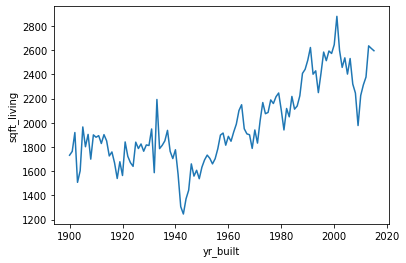

In [105]:
df = data[['sqft_living','yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot(x= 'yr_built', y='sqft_living', data = df)

# 7. ¿Cuál es el tamaño mediano del interior de los inmuebles por año de construcción?

<AxesSubplot:xlabel='yr_built', ylabel='sqft_living'>

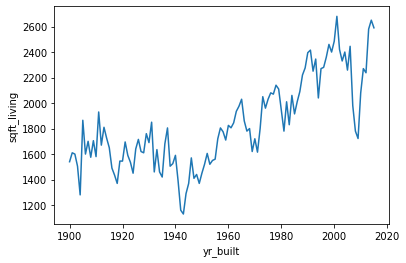

In [106]:
df = data[['sqft_living', 'yr_built']].groupby(['yr_built']).median().reset_index()
sns.lineplot(data = df, x = 'yr_built', y='sqft_living')

# 8. ¿Cuál es la desviación estándar del tamaño de las habitaciones de las propiedades por año de construcción?

<AxesSubplot:xlabel='yr_built', ylabel='sqft_living'>

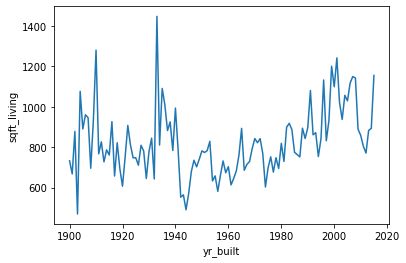

In [107]:
df = data[['yr_built','sqft_living']].groupby('yr_built').std().reset_index()
sns.lineplot(data = df, x = 'yr_built', y = 'sqft_living')

# 9. ¿Cómo es el crecimiento promedio de los precios de compra de inmuebles, por día, mes y año?

<AxesSubplot:xlabel='year_sale', ylabel='price'>

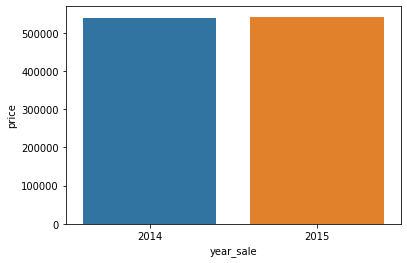

In [108]:
# Primera Gráfica (año)
# data['date']
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data['year_sale']=data['date'].dt.year
df = data[['year_sale','price']].groupby('year_sale').mean().reset_index()
sns.barplot(data =df, x= 'year_sale', y='price')

In [109]:
df

year_sale     price
0       2014 539181.43
1       2015 541988.99

In [110]:
# Segunda Gráfica (mes)

<AxesSubplot:xlabel='month_sale', ylabel='price'>

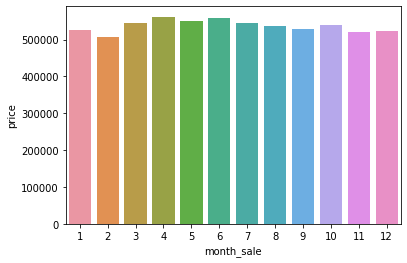

In [111]:
data['month_sale']=data['date'].dt.month
df = data[['month_sale','price']].groupby('month_sale').mean().reset_index()
sns.barplot(data =df, x= 'month_sale', y='price')

In [112]:
# Tercera Gráfica (día)

<AxesSubplot:xlabel='day_sale', ylabel='price'>

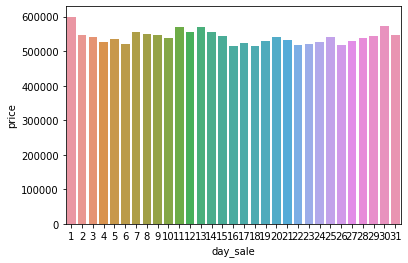

In [113]:
data['day_sale']=data['date'].dt.day
df = data[['day_sale','price']].groupby('day_sale').mean().reset_index()
sns.barplot(data =df, x= 'day_sale', y='price')

# 10. Me gustaría mirar en el mapa y poder identificar las casas con el precio más alto

In [134]:
import plotly.express as px
import pandas as pd

houses = data.loc[data['price']<1000000, ['id','lat','long','price']]
fig = px.scatter_mapbox(data_frame=houses,
                          lat = 'lat',
                          lon = 'long',
                          size = 'price',
                            color = 'price') 
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Y más preguntas del CEO 

1. Cree una nueva columna llamada: "dormitory_type"
    - Si el valor de la columna “dormitorios” es menor a 1 => ‘estudio’
    - Si el valor de la columna “dormitorios” es igual a 2 => 'apartamento'
    - Si el valor de la columna “dormitorios” es mayor a 2 => 'casa'
2. Haga un gráfico de barras que represente la suma de precios por el número de habitaciones.
3. Haga un gráfico de líneas que represente el promedio de precios para el año de construcción de las propiedades.
4. Haga un gráfico de barras que represente el promedio de precios por tipo de dormitorios.
5. Haga un gráfico de líneas que muestre la evolución del promedio de precios para el año de la reforma de la
inmuebles del año 1930.
6. Haga una tabla que muestre los precios promedio por año de construcción y tipo de dormitorio de la
propiedades
7. Crea un Tablero con los gráficos de las preguntas 02, 03, 04 ( Tablero: 1 Fila y 2 Columnas )
8. Cree un Tablero con los gráficos de las preguntas 02, 04 ( Tablero: 2 columnas )
9. Crea un Dashboard con las gráficas de las preguntas 03, 05 ( Dashboard: 2 Lines )
10. Haga un gráfico con el tamaño de los puntos igual al tamaño de la sala de estar
11. Adicione la siguiente información a cada inmueble:
    - Nombre de la calle
	- Número de la casa
    - Nombre del barrio
    - Nombre de la ciudad
	- Nombre del estado

# 1. Cree una nueva columna llamada: "dormitory_type"
    - Si el valor de la columna “dormitorios” es menor a 1 => ‘estudio’
    - Si el valor de la columna “dormitorios” es igual a 2 => 'apartamento'
    - Si el valor de la columna “dormitorios” es mayor a 2 => 'casa'


In [115]:
data['dormitory_type']

0            house
1            house
2        apartment
3            house
4            house
           ...    
21608        house
21609        house
21610    apartment
21611        house
21612    apartment
Name: dormitory_type, Length: 21613, dtype: object

# 2. Haga un gráfico de barras que represente la suma de precios por el número de habitaciones.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

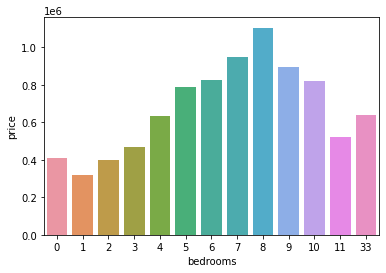

In [116]:
df = data[['bedrooms','price']].groupby('bedrooms').mean().reset_index()
sns.barplot(data =df, x= 'bedrooms', y = 'price')

# 3. Haga un gráfico de líneas que represente el promedio de precios para el año de construcción de las propiedades.

<AxesSubplot:xlabel='yr_built', ylabel='price'>

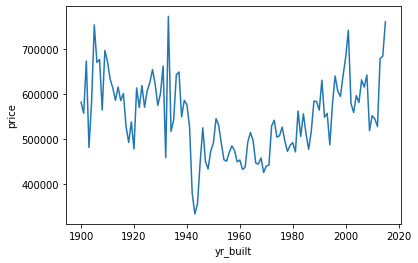

In [117]:
df = data[['yr_built', 'price']].groupby('yr_built').mean().reset_index()
sns.lineplot(x ='yr_built', y= 'price', data = df)

# 4. Haga un gráfico de barras que represente el promedio de precios por tipo de dormitorios.

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

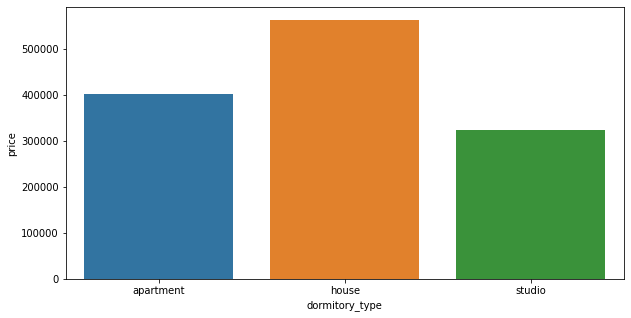

In [118]:
plt.figure(figsize = (10, 5))
df = data[['dormitory_type','price']].groupby('dormitory_type').mean().reset_index()
sns.barplot(data = df, x = 'dormitory_type', y = 'price')

# 5. Haga un gráfico de línea que muestre la evolución de la media de los precios por año de reforma, a partir de 1930.

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

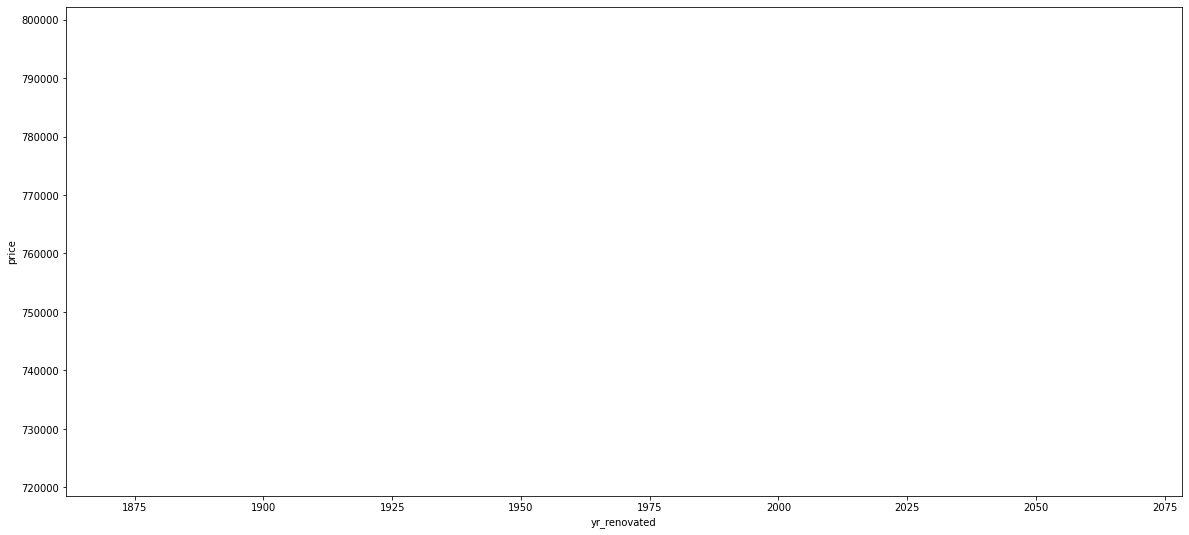

In [122]:
plt.figure(figsize = (20, 9))
df = data.loc[data['yr_renovated']>1930, ['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
sns.lineplot(data = df, x = 'yr_renovated', y = 'price')

# 6. Haga una tabla que muestre los precios promedio por año de construcción y tipo de dormitorio de la propiedades

<AxesSubplot:xlabel='yr_built', ylabel='price'>

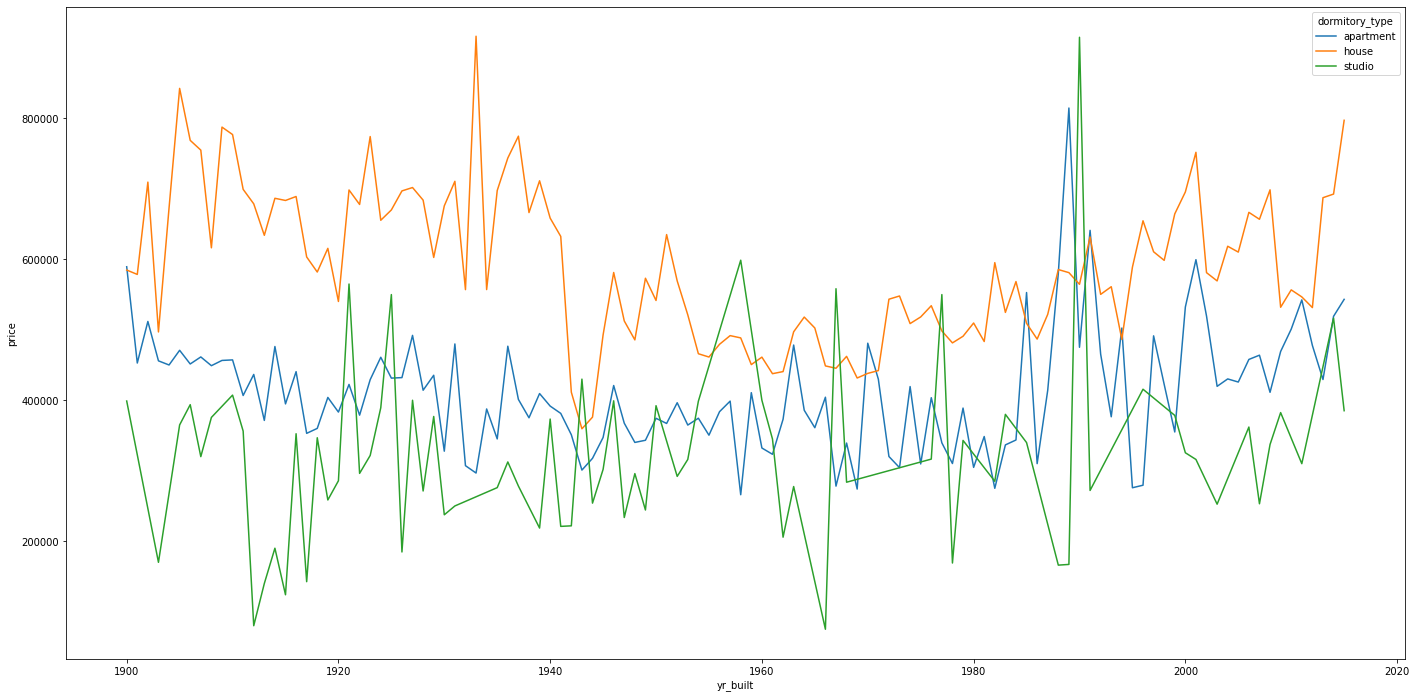

In [120]:
plt.figure(figsize = (24,12))
df = data[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean().reset_index()
sns.lineplot(data = df, 
             x = 'yr_built', 
             y = 'price', 
             hue= 'dormitory_type')

# 7. Crea un Tablero con los gráficos de las preguntas 02, 03, 04 ( Tablero: 1 Fila y 2 Columnas )

<BarContainer object of 3 artists>

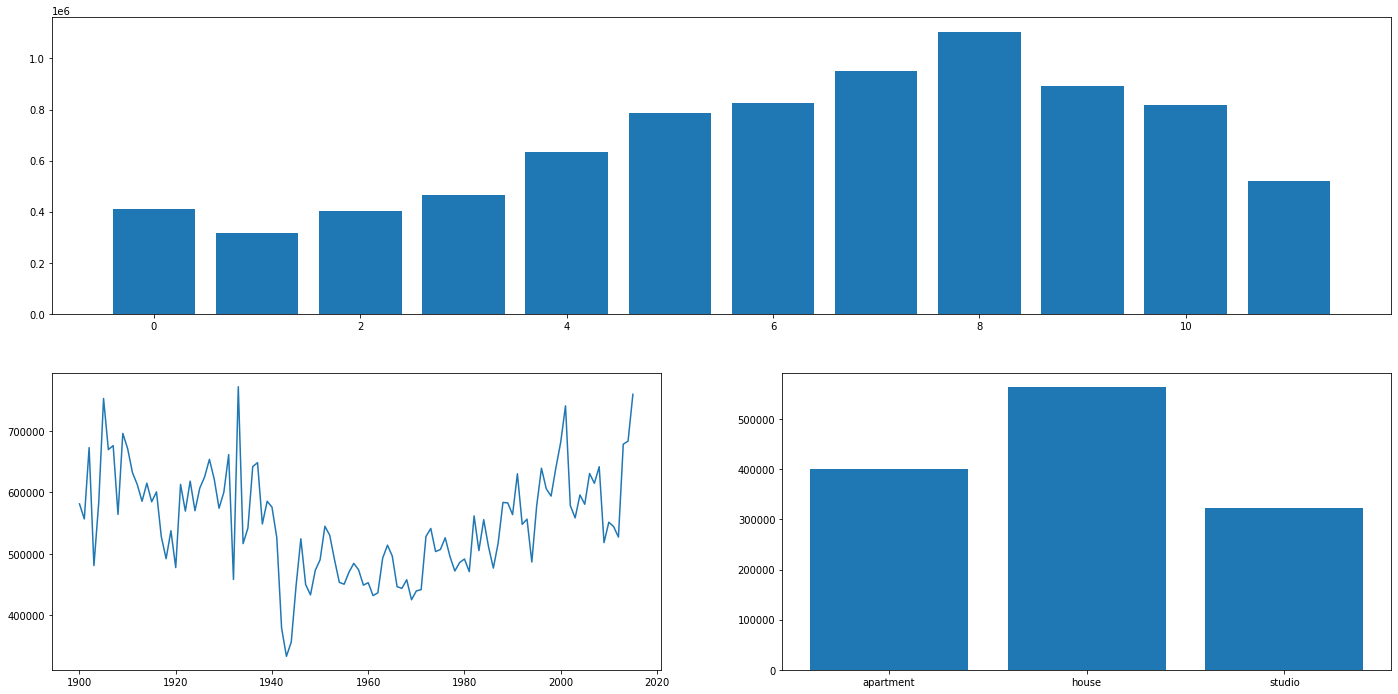

In [121]:
fig = plt.figure(figsize = (24,12))
gs = gridspec.GridSpec(2, 2, figure = fig)

ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

# primer gráfico
df = data.loc[data['bedrooms']<30, ['bedrooms','price']].groupby('bedrooms').mean().reset_index()
ax1.bar(df['bedrooms'], df['price'])
# Segundo gráfico 
df = data[['yr_built', 'price']].groupby('yr_built').mean().reset_index()
ax2.plot(df['yr_built'], df['price'])
# Tercer gráfico
df = data[['dormitory_type','price']].groupby('dormitory_type').mean().reset_index()
ax3.bar(df['dormitory_type'], df['price'])

# 8. Cree un Tablero con los gráficos de las preguntas 02, 04 ( Tablero: 2 columnas )

<BarContainer object of 3 artists>

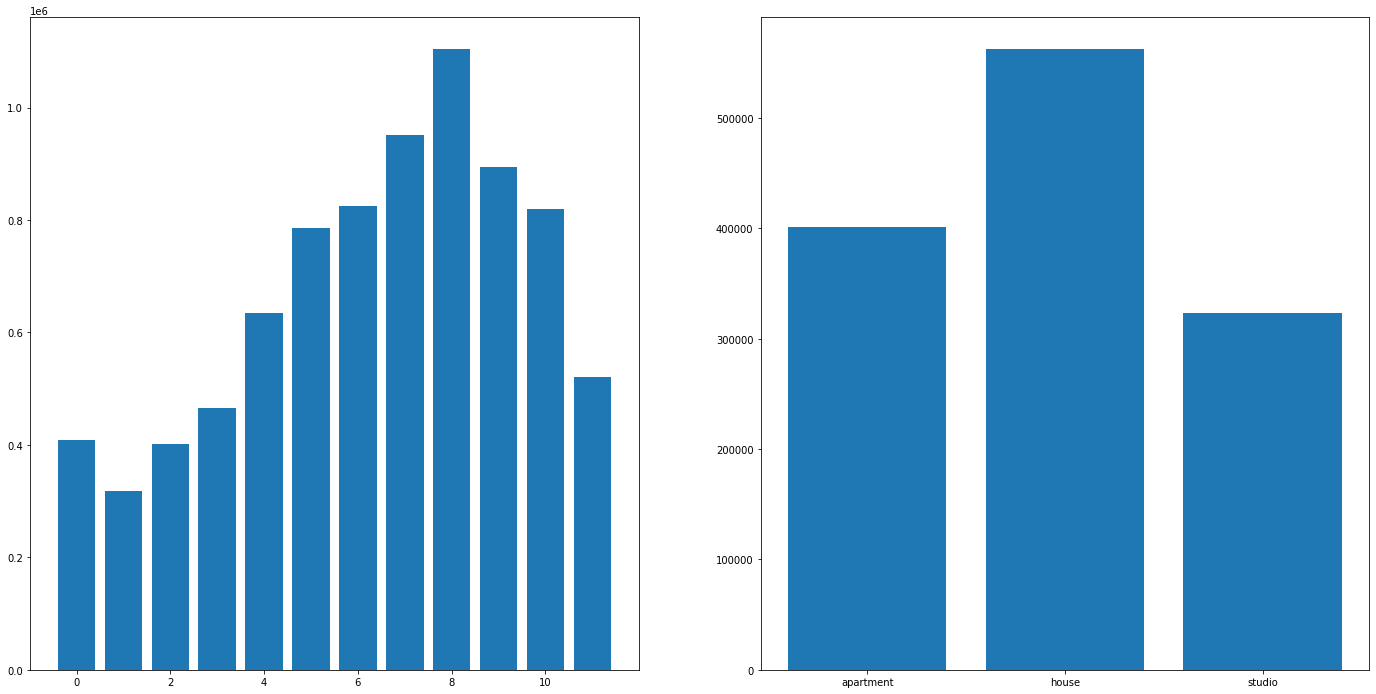

In [125]:
fig = plt.figure(figsize = (24,12))
gs = gridspec.GridSpec(1, 2, figure = fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

# primer gráfico
df = data.loc[data['bedrooms']<30, ['bedrooms','price']].groupby('bedrooms').mean().reset_index()
ax1.bar(df['bedrooms'], df['price'])
# Tercer gráfico
df = data[['dormitory_type','price']].groupby('dormitory_type').mean().reset_index()
ax2.bar(df['dormitory_type'], df['price'])



# 9. Crea un Dashboard con las gráficas de las preguntas 03, 05 ( Dashboard: 2 Lines )

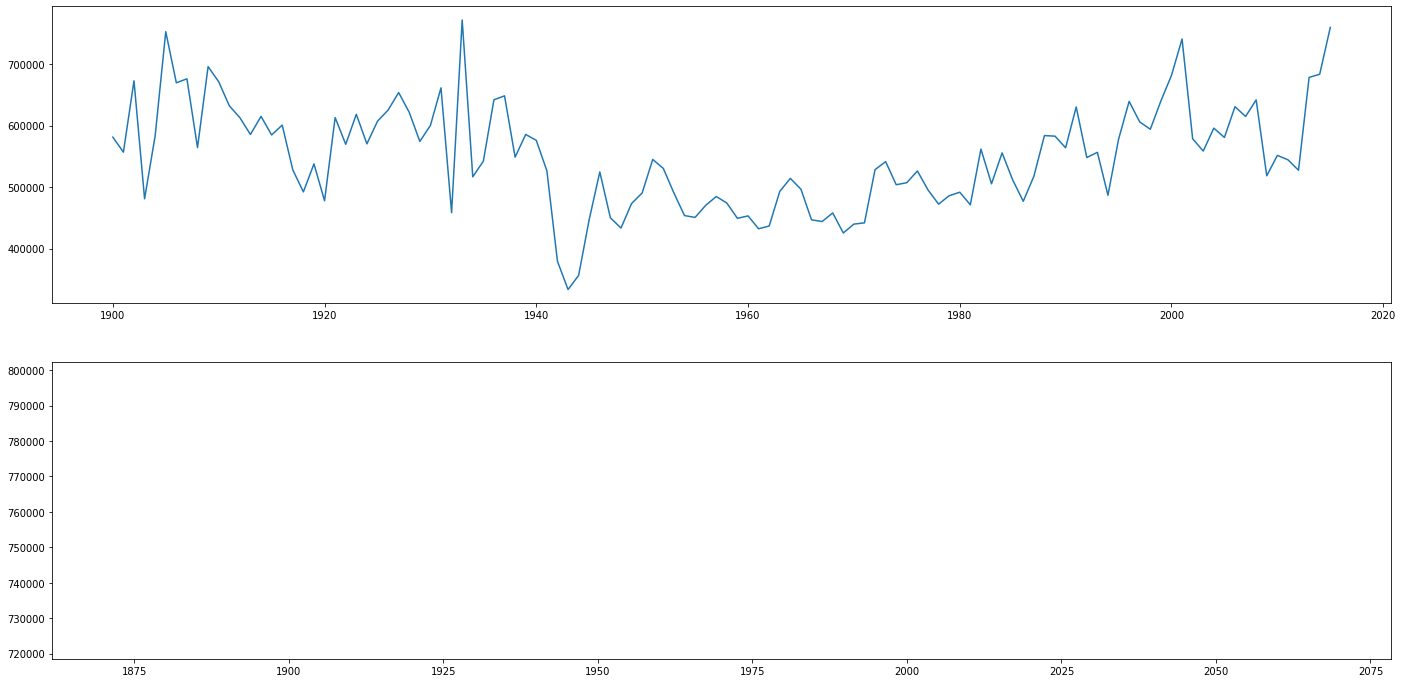

In [126]:
fig = plt.figure(figsize = (24,12))
gs = gridspec.GridSpec(2,1, figure = fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])

# primer gráfico
df = data[['yr_built', 'price']].groupby('yr_built').mean().reset_index()
ax1.plot(df['yr_built'], df['price'])
# segundo  gráfico
df = data.loc[data['yr_renovated']>1930, ['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot(df['yr_renovated'], df['price'])


# 10. Haga un gráfico con el tamaño de los puntos igual al tamaño del área construida

In [127]:
houses = data[['id','lat','long','price','sqft_living']]

houses['price_tier'] = houses['price'].apply(lambda x: 'tier 1' if x <= 321950 else
                                                      'tier 2' if (x > 321950) & (x <= 450000) else
                                                      'tier 3' if (x > 450000) & (x <= 645000) else
                                                      'tier 4')
              
fig = px.scatter_mapbox(data_frame=houses,
                  lat = 'lat',
                  lon = 'long',
                  size = 'sqft_living',
                    color = 'price_tier') 
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

C:\Users\Windows\AppData\Local\Temp\ipykernel_716\2107335298.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Más preguntas del CEO 

1. ¿Cuántas propiedades por nivel?
    - Nivel 0: Precio entre 0,00 y 321.950
    - Nivel 1: Precio entre 321.950 y 450.000
    - Nivel 2: Precio entre 450.000 y  645.000
    - Nivel 3: Precio superior 645.000

2. Adicione la siguiente información a cada inmueble:
    - Nombre de la calle
	- Número de la casa
    - Nombre del barrio
    - Nombre de la ciudad
	- Nombre del estado

3. Agregue el nivel de propiedades en el mapa como un color
4. Agregue el precio de la propiedad como tamaño de punto en el mapa
5. Agregue opciones de filtro para que yo haga mi propio análisis:
    - Quiero elegir ver propiedades con vista al agua o no.
    - Quiero filtrar propiedades hasta un cierto valor de precio.

# 1. ¿Cuántas propiedades por nivel?
    - Nivel 0: Precio entre 0,00 y 321.950
    - Nivel 1: Precio entre 321.950 y 450.000
    - Nivel 2: Precio entre 450.000 y  645.000
    - Nivel 3: Precio superior 645.000

# 2. Adicione la siguiente información a cada inmueble:
    - Nombre de la calle
	- Número de la casa
    - Nombre del barrio
    - Nombre de la ciudad
	- Nombre del estado

In [ ]:
(47.51,-122.26)

In [136]:
from geopy.geocoders import Nominatim

In [179]:
df_test = data.head()

In [172]:
a = [0,1,2]
b = ['a','b','c']

print(a)
print(b)
print(a+b)

[0, 1, 2]
['a', 'b', 'c']
[0, 1, 2, 'a', 'b', 'c']


In [173]:
'a'+'b'

'ab'

In [199]:
for i in range(df_test.shape[0]):
    print(i)

0
1
2
3
4


In [203]:
df_test

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00         3       1.00         1180   
1  6414100192 2014-12-09 538000.00         3       2.25         2570   
2  5631500400 2015-02-25 180000.00         2       1.00          770   
3  2487200875 2014-12-09 604000.00         4       3.00         1960   
4  1954400510 2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ... yr_renovated  zipcode   lat  \
0      5650    1.00           0     0  ...            0    98178 47.51   
1      7242    2.00           0     0  ...         1970    98125 47.72   
2     10000    1.00           0     0  ...            0    98028 47.74   
3      5000    1.00           0     0  ...            0    98136 47.52   
4      8080    1.00           0     0  ...            0    98074 47.62   

     long  house_age dormitory_type  condition_type  year_sale  month_sale  \
0 -122.26  old_house          house         regular       2014          10   
1 -122.32  old_house          house         regular       2014          12   
2 -122.23  old_house      apartment         regular       2015           2   
3 -122.39  old_house          house            good       2014          12   
4 -122.05  old_house          house         regular       2015           2   

  day_sale  
0       13  
1        9  
2       25  
3        9  
4       18  

[5 rows x 25 columns]

In [ ]:
for i in range(data.shape[0]):
    geolocator = Nominatim(user_agent='ErnestoPerez'+str(i))
    coord = str(data.loc[i,'lat'])+','+str(data.loc[i,'long'])
    geoloc = geolocator.reverse(coord)
    try:
        data.loc[i,'house_number'] = geoloc.raw['address']['house_number']
    except:
        None
    try:
        data.loc[i,'road'] = geoloc.raw['address']['road']
    except:
        None
    try:
        data.loc[i,'neighbourhood'] = geoloc.raw['address']['neighbourhood']
    except:
        None
    try:
         data.loc[i,'city'] =geoloc.raw['address']['city']
    except:
        None
    if i % 150 == 0: 
        print('Voy en la {}-ésima iteración'.format(i))


Voy en la 0-ésima iteración
Voy en la 150-ésima iteración
Voy en la 300-ésima iteración
Voy en la 450-ésima iteración
Voy en la 600-ésima iteración
Voy en la 750-ésima iteración
Voy en la 900-ésima iteración


In [207]:
df_test

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00         3       1.00         1180   
1  6414100192 2014-12-09 538000.00         3       2.25         2570   
2  5631500400 2015-02-25 180000.00         2       1.00          770   
3  2487200875 2014-12-09 604000.00         4       3.00         1960   
4  1954400510 2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ... dormitory_type  condition_type  \
0      5650    1.00           0     0  ...          house         regular   
1      7242    2.00           0     0  ...          house         regular   
2     10000    1.00           0     0  ...      apartment         regular   
3      5000    1.00           0     0  ...          house            good   
4      8080    1.00           0     0  ...          house         regular   

   year_sale  month_sale  day_sale house_number                      road  \
0       2014          10        13        10012         61st Avenue South   
1       2014          12         9          837    Northeast 127th Street   
2       2015           2        25        15109     81st Avenue Northeast   
3       2014          12         9         9236  Fauntleroy Way Southwest   
4       2015           2        18          923    221st Avenue Northeast   

   neighbourhood       city       county  
0  Rainier Beach    Seattle  King County  
1            NaN    Seattle  King County  
2            NaN    Kenmore  King County  
3     Fauntleroy    Seattle  King County  
4            NaN  Sammamish  King County  

[5 rows x 30 columns]

In [184]:
try:
    print(geoloc.raw['address']['neighbourhood'])
except:
    None

# 3. Agregue el nivel de propiedades en el mapa como un color

# 4. Agregue el precio de la propiedad como tamaño de punto en el mapa


# 5. Agregue opciones de filtro para que yo haga mi propio análisis:
    - Quiero elegir ver propiedades con vista al agua o no.
    - Quiero filtrar propiedades hasta un cierto valor de precio.


In [131]:
import folium

In [132]:
density_map = folium.Map(location = [data['lat'].mean(),data['long'].mean()], 
                        default_zoom_start =15)

marker_cluster = MarkerCluster().add_to(density_map)

for name, row in df.iterrows(): 
    folium.Marker([row['lat'], row['long']],
                popup = 'Sold in R${0} on: {1}. Features: {2} sqft, {3} bedrooms, {4} bathrooms, year built:{5}'.format(
                    row['price'], 
                    row['date'],
                    row['sqft_living'],
                    row['bedrooms'],
                    row['bathrooms'],
                    row['yr_built']
                )
    ).add_to(marker_cluster)

NameError: name 'MarkerCluster' is not defined